**линейный классификатор на TensorFlow**

Евгений Борисов <borisov.e@solarl.ru>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.1


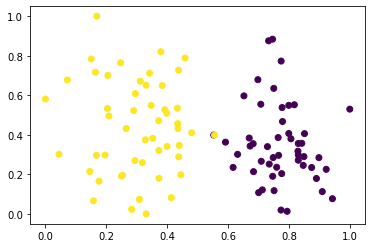

In [3]:
from sklearn.datasets import make_blobs

n_samples = 100 # количество примеров
n_fetch = 2 # размерность пространства признаков
# n_out = 1 # размерность выхода модели 

X,y = make_blobs( 
        n_samples=n_samples,
        centers=n_fetch,  
        random_state=461,
        cluster_std=[1.0, 1.1,],
       )

X = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
y = y.reshape([-1,1])
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
batch_size = n_samples//5

# пакуем данные в батчи TF
train_dataset = tf.data.Dataset.from_tensor_slices((
        tf.cast(X,tf.float32),
        tf.cast(y.reshape([-1,1]),tf.float32)
    )).batch(batch_size)

In [5]:
# строим линейный классификатор

n_out = y.shape[1] # количество выходов

W = tf.Variable(tf.zeros([n_fetch,n_out]))
b = tf.Variable(tf.zeros([n_out]))

model = lambda x: tf.matmul(x,W)+b

In [6]:
learning_rate = .05 # коэффициент скорости обучения
training_epochs = 30 # количество эпох обучения

# ф-ция потери MSQE
compute_loss = lambda true, pred: tf.reduce_mean(tf.reduce_sum(tf.losses.mean_squared_error(true, pred), axis=-1))

# объект оптимизатор
optimizer = tf.optimizers.Adam(learning_rate)

loss_history = [] # история измениения ф-ции потери

for epoch in range(training_epochs):
    
    for i, (x_, y_) in enumerate(train_dataset):
        
        # tf.GradientTape() allows us to track TensorFlow computations 
        # and calculate gradients with respect to some given variables
        with tf.GradientTape() as tape:
            loss = compute_loss(y_, model(x_) )
   
        # считаем градиент ф-ции потери
        grads = tape.gradient(loss, [W, b])
        
        # изменияем веса
        optimizer.apply_gradients(zip(grads, [W, b]))
        
        # обновляем историю значений ф-ции потери 
        loss_history.append(loss.numpy())

In [7]:
# оптимизированные веса
W.numpy(),b.numpy()

(array([[-1.7485144 ],
        [ 0.02518954]], dtype=float32),
 array([1.4311124], dtype=float32))

In [8]:
# проверяем результат

s = model(tf.cast(X,tf.float32)).numpy() 
r = (s>0.5).astype(np.int8)

# accuracy, доля правильных ответов
(y==r).sum()/y.shape[0]

0.99

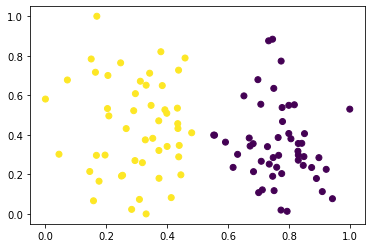

In [9]:
# результат классификации
plt.scatter(X[:,0],X[:,1],c=r) 

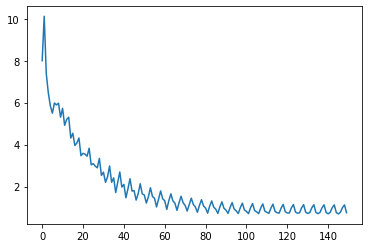

In [10]:
# история изменения ф-ции потери
plt.plot(loss_history) 